In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# create data
# y = 3x + 4

X = np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100,1)


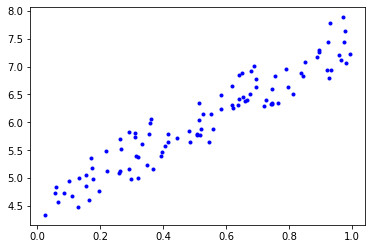

In [3]:
plt.plot(X, y, 'b.')

In [4]:
X_x0 = np.c_[np.ones((100, 1)), X]
theta_hat = np.linalg.inv(X_x0.T.dot(X_x0)).dot(X_x0.T).dot(y)
theta_hat

array([[4.4998344 ],
       [2.91717825]])

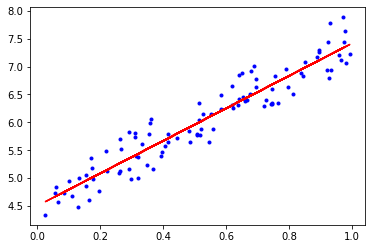

In [5]:
y_hat = theta_hat[0] + theta_hat[1] * X

plt.plot(X, y, 'b.')
plt.plot(X, y_hat, 'r')

In [6]:
X_new = np.array([[0], [2]]) # x = 0 and x = 2
X_new_x0 = np.c_[np.ones((2, 1)), X_new]

y_predict = X_new_x0.dot(theta_hat)
y_predict

array([[ 4.4998344 ],
       [10.33419089]])

In [7]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X, y)
linear_regression.intercept_, linear_regression.coef_

(array([4.4998344]), array([[2.91717825]]))

In [8]:
linear_regression.predict(X_new)

array([[ 4.4998344 ],
       [10.33419089]])

In [9]:
# Batch Gradient Descent

eta = 0.1   # Learning rate
n_iterations = 1000
m = 100

theta = np.random.rand(2,1)
for iterations in range(n_iterations):
    gradients = 2/m * X_x0.T.dot(X_x0.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[4.49983648],
       [2.91717453]])

In [10]:
# Batch Gradient Descent

eta = 0.02   # Learning rate
n_iterations = 10
m = 100

theta = np.random.rand(2,1)
for iterations in range(n_iterations):
    gradients = 2/m * X_x0.T.dot(X_x0.dot(theta) - y)
    theta = theta - eta * gradients

theta1 = theta


# Batch Gradient Descent

eta = 0.1   # Learning rate
n_iterations = 1000
m = 100

theta = np.random.rand(2,1)
for iterations in range(n_iterations):
    gradients = 2/m * X_x0.T.dot(X_x0.dot(theta) - y)
    theta = theta - eta * gradients

theta2 = theta


# Batch Gradient Descent

eta = 0.5   # Learning rate
n_iterations = 100
m = 100

theta = np.random.rand(2,1)
for iterations in range(n_iterations):
    gradients = 2/m * X_x0.T.dot(X_x0.dot(theta) - y)
    theta = theta - eta * gradients

theta3 = theta


theta1, theta2, theta3

(array([[1.94236997],
        [1.23256184]]),
 array([[4.49983398],
        [2.91717899]]),
 array([[4.49978022],
        [2.91727491]]))

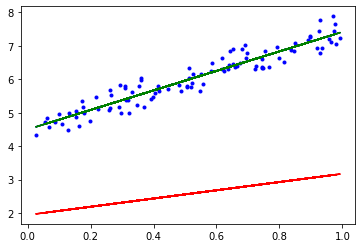

In [11]:
y_hat11 = theta1[0] + theta1[1] * X
y_hat12 = theta2[0] + theta2[1] * X
y_hat13 = theta3[0] + theta3[1] * X
plt.plot(X, y, 'b.')
plt.plot(X, y_hat11, 'r')
plt.plot(X, y_hat12, 'b')
plt.plot(X, y_hat13, 'g')

In [12]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_x0[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta*gradients


theta

array([[4.51351499],
       [2.86226137]])

In [13]:
from sklearn.linear_model import SGDRegressor
sgd_regressor = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_regressor.fit(X, y.ravel())

sgd_regressor.intercept_, sgd_regressor.coef_

(array([4.57253947]), array([2.74998776]))

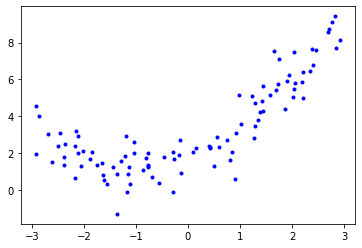

In [14]:
# Polynomial Regression

# generating some nonlinear data

m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

plt.plot(X, y, 'b.')

[1.7401606]
[[0.         1.05095714 0.52110848]]


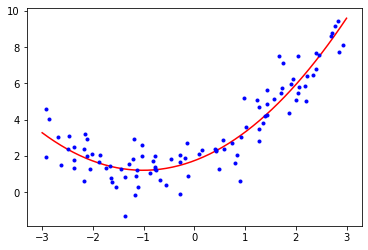

In [15]:
from sklearn.preprocessing import PolynomialFeatures


poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# now our data will be X_poly
# we have to fit LinearRegression() to the data

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_)
print(lin_reg.coef_)
# now let's plot it!

X_plot = np.linspace(-3,3)
plt.plot(X_plot,
        (lin_reg.intercept_ + lin_reg.coef_[0][2]*X_plot*X_plot + X_plot*lin_reg.coef_[0][1]),
        'red')
lin_reg.coef_[0][1]

plt.plot(X, y, 'b.')

In [16]:
# polynomial regression example


degree = np.random.randint(2, 10)
degree = 2
m = 100
X = 50 * np.random.rand(m,1) - 25
y_polymomial = 0

for i in range(degree):
    y_polymomial += np.rذandom.randint(0, 15) * (X ** (degree))

y_polymomial += np.random.randn(m, 1)

plt.plot(X, y_polymomial, 'b.')

AttributeError: module 'numpy' has no attribute 'rذandom'

In [ ]:
# Ridge Regression
# it uses l2 norm
from sklearn.linear_model import  Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.90138345]])

In [ ]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.87918857])

In [ ]:
# Lasso Regression
# it uses l1 norm

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])


array([4.85050017])

In [ ]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.855214])

In [ ]:
# Logistic Regression

from sklearn import datasets
iris = datasets.load_iris()
iris.keys()


sklearn.utils.Bunch